# SAM-based Semantic Segmentation for ZOD Dataset

This notebook explains how the to convert ZOD (Zenseact Open Dataset) annotations into semantic segmentation masks using Meta's Segment Anything Model (SAM).

## Overview

The script demonstrates how to:
1. Load the ZOD dataset with object annotations
2. Extract 2D bounding boxes from annotations (both direct 2D and projected 3D boxes)
3. Use SAM to generate segmentation masks from bounding box prompts
4. Create semantic segmentation masks with class labels
5. Save results in multiple formats for analysis

## Key Components

### 1. Dependencies and Imports

The script uses several key libraries:
- **ZOD SDK**: For accessing the Zenseact Open Dataset
- **Segment Anything (SAM)**: Meta's foundation model for image segmentation

### 2. Requirements and Setup

To run the script, you need:

#### Required Packages
```bash
pip install segment-anything
pip install torch torchvision  # For SAM
pip install zod  # ZOD dataset SDK
pip install opencv-python
pip install matplotlib
pip install pillow
pip install numpy
```

#### SAM Model Checkpoint
Download the SAM model weights:
```bash
wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
```

### 2. Class Configuration

In [3]:
# Class mapping for semantic segmentation
class_mapping = {
    'Vehicle': 1,
    'Pedestrian': 2,
    'Cyclist': 3,
    'TrafficSign': 4,
    'TrafficLight': 4,
    'Animal': 5,
    'VulnerableVehicle': 3,
    'Truck': 1,
    'Bus': 1,
    'Motorcycle': 1,
    'Bicycle': 2,
}

# Color mapping for visualization
class_colors = {
    0: (0, 0, 0),       # Background - Black
    1: (100, 0, 0),     # Vehicles
    2: (0, 100, 0),     # Pedestrians
    3: (0, 0, 100),     # Traffic Signs
    4: (0, 100, 100),   # Cyclists
    5: (100, 0, 100),   # Animal
}

### 3. Output Generation

The script generates multiple output formats:

#### Output Structure
```
output_sam/
├── camera/           # Original images
├── annotation/       # Grayscale masks (pixel value = class ID)
├── annotation_rgb/   # RGB masks (CLFT format: [class_id, 0, 0])
└── visualizations/   # SAM overlay visualizations
```

## Bounding Box vs Semantic Segmentation Comparison

Compare the bounding box detection results with SAM-generated semantic segmentation visualizations.

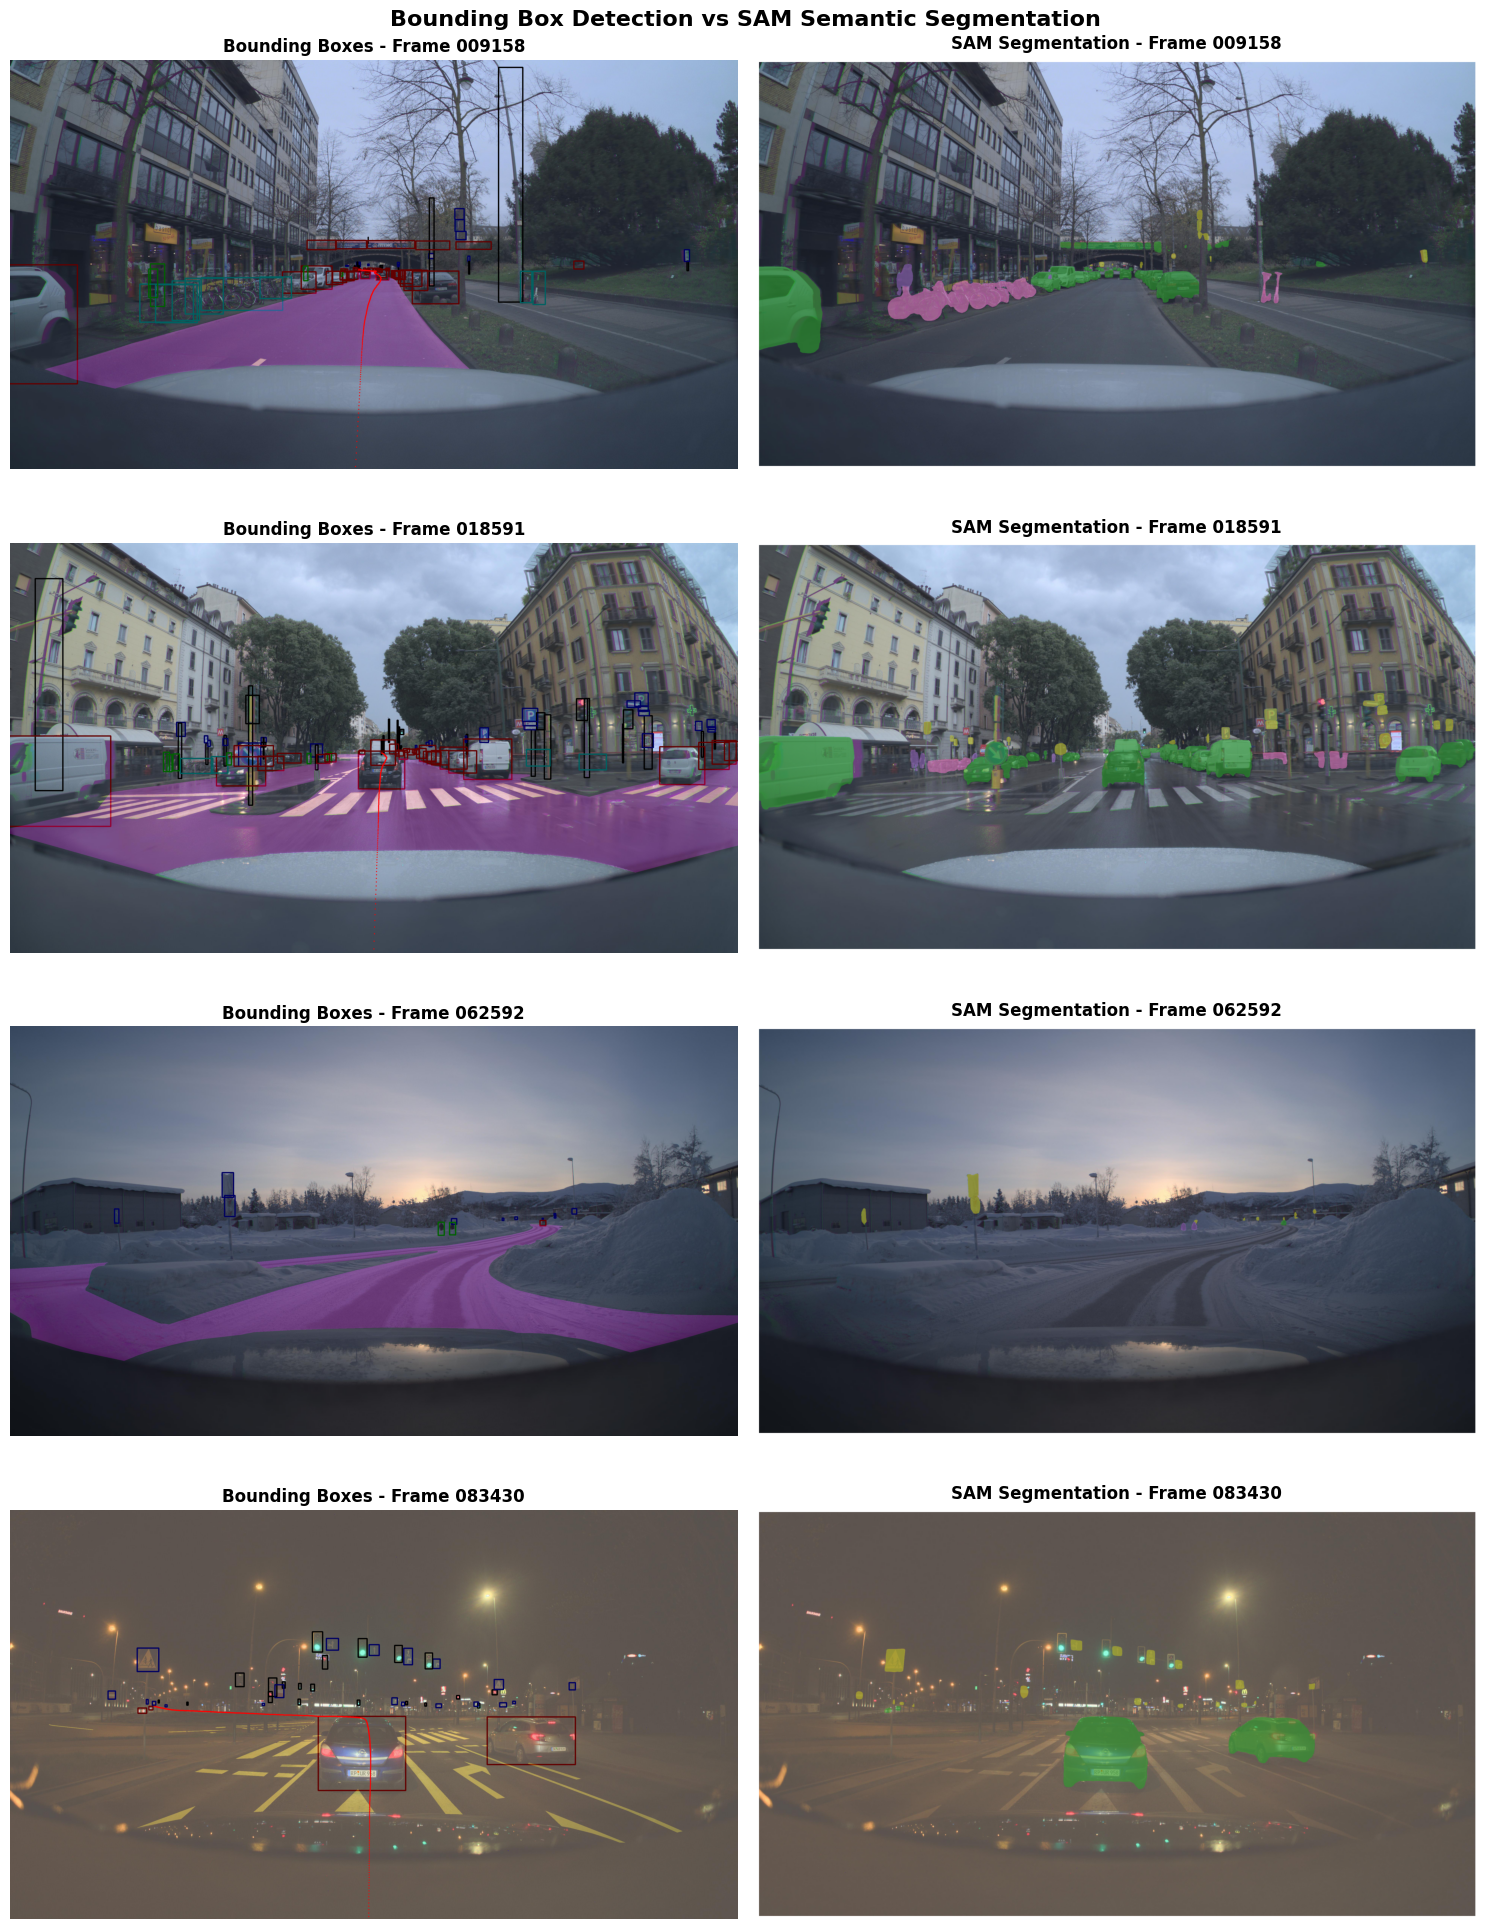

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from pathlib import Path

# Paths to the image directories
bbox_dir = Path("../output/camera")
sam_viz_dir = Path("../output_clft/visualizations")

# Specific example files to display
example_files = [
    "camera_009158.png",
    "camera_018591.png", 
    "camera_062592.png",
    "camera_083430.png"
]

# Create visualization
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Bounding Box Detection vs SAM Semantic Segmentation', fontsize=16, fontweight='bold')

for i, bbox_file in enumerate(example_files):
    # Extract frame number (e.g., camera_009158.png -> 009158)
    frame_num = bbox_file.split('_')[1].split('.')[0]
    sam_file = f"frame_{frame_num}_sam_overlay.png"
    
    # Load and display bounding box image
    bbox_path = bbox_dir / bbox_file
    if bbox_path.exists():
        bbox_img = mpimg.imread(bbox_path)
        axes[i, 0].imshow(bbox_img)
        axes[i, 0].set_title(f'Bounding Boxes - Frame {frame_num}', fontweight='bold')
        axes[i, 0].axis('off')
    
    # Load and display SAM segmentation
    sam_path = sam_viz_dir / sam_file
    if sam_path.exists():
        sam_img = mpimg.imread(sam_path)
        axes[i, 1].imshow(sam_img)
        axes[i, 1].set_title(f'SAM Segmentation - Frame {frame_num}', fontweight='bold')
        axes[i, 1].axis('off')

plt.tight_layout()
plt.show()